In [1]:
import pandas as pd
import numpy as np

f19_sales = pd.read_csv('../data/F19Sales.csv')
f18_sales = pd.read_csv('../data/F18Sales.csv')
f17_sales = pd.read_csv('../data/F17Sales.csv')
f16_sales = pd.read_csv('../data/F16Sales.csv')
f15_sales = pd.read_csv('../data/F15Sales.csv')

sales = f18_sales
sales.rename(columns = {'Customer ID':'ID Value'}, inplace = True)

alum = pd.read_csv('../data/AlumniReport.csv')

merge = pd.merge(left=sales, right=alum, on=['ID Value'])

merge.head()

,ID Value,Item,Qty,PL,PT,I Disp,Seatblock,Priority Points,Item Cost,Csz,...,Item Name,Degree,ID Type,Primary Degree Institution,Primary Degree Class Year,Primary Degree Education College,Primary Degree Education Status,Primary Address Country,Primary Address State,Primary Address Zip Code
0,477328,F04,2,4,PD,NaN,"H2:42:70:W6,C6",992.63,190.00,"Ann Arbor, MI 48103",...,Nebraska,A.B.Ed. 1973 School of Education; Teach.Cert. ...,Athletics Ticket ID,University of Michigan - Ann Arbor,1973.0,School of Education,Graduated,United States,Michigan,48103
1,385061,F02,4,5,TP,E (Email),"1:6:34:4,1",99.98,286.84,"Brighton, MI 48114",...,Western Michigan,B.S.E.I.O. 1981 College of Engineering,Athletics Ticket ID,University of Michigan - Ann Arbor,1981.0,College of Engineering,Graduated,United States,Michigan,48114
2,97056,F06,1,4,TP,E (Email),"1:5:39:4,4",99.92,71.71,"Duluth, GA 30096",...,Maryland,"B.S. 1998 College of Lit, Science & Arts; B.S....",Athletics Ticket ID,University of Michigan - Ann Arbor,1998.0,"College of Lit, Science & Arts",Graduated,United States,Georgia,30096
3,54539,F06,3,5,PD,M (Mail),"1:9:95:13,15",99.72,237.00,"Fenton, MI 48430",...,Maryland,B.S.E.(E.E.) 1971 College of Engineering,Athletics Ticket ID,University of Michigan - Ann Arbor,1971.0,College of Engineering,Graduated,United States,Michigan,48430
4,46710,F07,4,6,PD,M (Mail),"1:32:87:13,10",99.62,444.00,"Green Valley, AZ 85614",...,Wisconsin,B.S.Pharm. 1975 College of Pharmacy,Athletics Ticket ID,University of Michigan - Ann Arbor,1975.0,College of Pharmacy,Graduated,United States,Arizona,85614


In [2]:
total_tickets_sold = 0
for qty in sales['Qty']:
    qty = qty.replace(',', '')
    total_tickets_sold += int(qty)

# Total number of tickets sold
total_tickets_sold

128888

In [3]:
# Find a alum grad. year for every ticket sold
sales_graduation_years = []
for i, year in enumerate(merge['Primary Degree Class Year']):
    for _ in range(int(merge['Qty'][i])):
        sales_graduation_years.append(int(year))

# Number of alum tickets sold
print(len(sales_graduation_years))

# Prop of tickets sold to alum
len(sales_graduation_years) / total_tickets_sold

12111


0.09396530320898765

In [4]:
# Find total money spent on tickets
total_money_spent = np.sum(sales['Item Cost'])
print(total_money_spent)

# Find total money spent on tickets by alumni
total_money_spent_alum = np.sum(merge['Item Cost'])
print(total_money_spent_alum)

# Prop of revenue generated by alum
total_money_spent_alum / total_money_spent


9706193.379999999
970143.71


0.09995099747332667

In [12]:
# Alum buy 10.87% of all tickets, but generate 12.44% of all revenue

# Takeaway: Alumni spent about (12.44/10.87) = 1.1450 times more on tickets than the general public

# Alumni are more willing to spend money on FB tix

print((total_money_spent_alum / total_money_spent) / (len(sales_graduation_years) / total_tickets_sold))

1.0637011115797315


Text(0.5, 0, 'Graduation Year')

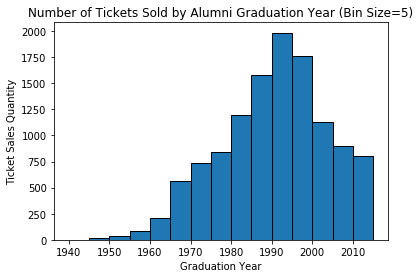

In [6]:
import matplotlib.pyplot as plt

# Clean data, remove any years below 1900
while np.min(sales_graduation_years) < 1900:
    sales_graduation_years.remove(np.min(sales_graduation_years))

BIN_SIZE = 5    

bins = np.arange(1940,2020,BIN_SIZE)

# Look at alum that bought tickets based on grad year
plt.hist(x=sales_graduation_years, bins=bins, edgecolor='black')
plt.title(f'Number of Tickets Sold by Alumni Graduation Year (Bin Size={BIN_SIZE})')
plt.ylabel('Ticket Sales Quantity')
plt.xlabel('Graduation Year')
# plt.axis([1800, 2020, 0, 20000])

Text(0.5, 0, 'Estimated Age (based on graduation at 21)')

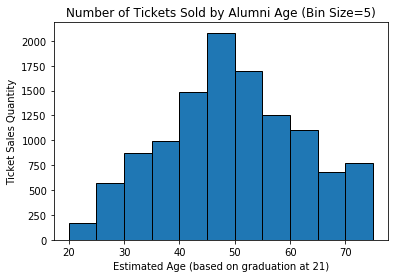

In [7]:
# Estimate ages

AGE_OF_GRAD = 21

bins = np.arange(20, 80, BIN_SIZE)
ages = []
for year in sales_graduation_years:
    ages.append(2020 - (year - AGE_OF_GRAD))

plt.hist(x=ages, bins=bins, edgecolor='black')
plt.title(f'Number of Tickets Sold by Alumni Age (Bin Size={BIN_SIZE})')
plt.ylabel('Ticket Sales Quantity')
plt.xlabel('Estimated Age (based on graduation at 21)')


Text(0.5, 0, 'Graduation Year')

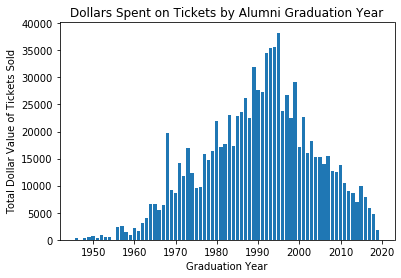

In [8]:
from collections import defaultdict

# Find total dollars spent by alumni by grad. year
rev_per_year = defaultdict(int)

for i, year in enumerate(merge['Primary Degree Class Year']):
    if year > 1900:
        rev_per_year[year] += merge['Item Cost'][i]
    
    
rpy = dict(sorted(rev_per_year.items()))
rpy
# 1958.0: 2421.62
#list(rev_per_year.keys())
# list(rev_per_year.values())

years = list(rpy.keys())
values = list(rpy.values())

plt.bar(years, values, align='center')
plt.title('Dollars Spent on Tickets by Alumni Graduation Year')
plt.ylabel('Total Dollar Value of Tickets Sold')
plt.xlabel('Graduation Year')

Text(0.5, 0, 'Estimated Age (based on graduation at 21)')

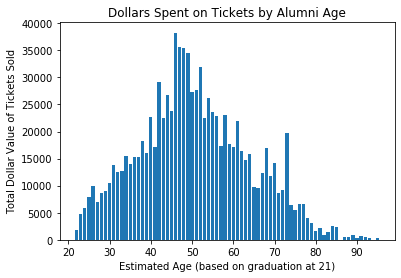

In [9]:
ages = []
for year in years:
    ages.append(2020 - (year - AGE_OF_GRAD))
    
plt.bar(ages, values, align='center')
plt.title('Dollars Spent on Tickets by Alumni Age')
plt.ylabel('Total Dollar Value of Tickets Sold')
plt.xlabel('Estimated Age (based on graduation at 21)')

Text(0.5, 0, 'Graduation Year')

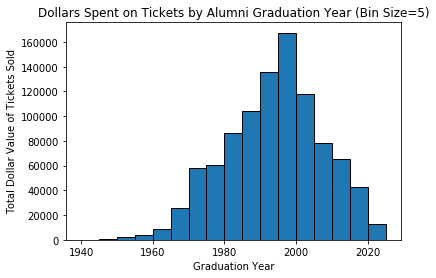

In [10]:
# Bin total dollars spent on tickets
BIN_SIZE = 5

rev_per_bin = defaultdict(int)

current_bin = 1940

# rev_per_bin[1940] represents all tickets sold from 1940 to (1940 + BIN_SIZE)
for year in range(1940, 2020):
    rev_per_bin[current_bin] += rev_per_year[year]
    if year > current_bin:
        current_bin += BIN_SIZE
        

years = list(rev_per_bin.keys())
values = list(rev_per_bin.values())

plt.bar(years, values, align='edge', width=5, edgecolor='black')
plt.title(f'Dollars Spent on Tickets by Alumni Graduation Year (Bin Size={BIN_SIZE})')
plt.ylabel('Total Dollar Value of Tickets Sold')
plt.xlabel('Graduation Year')

Text(0.5, 0, 'Estimated Age (based on graduation at 21)')

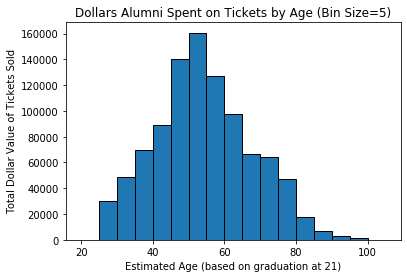

In [11]:
rev_per_bin_age = defaultdict(int)

current_bin = 20

# rev_per_bin[20] represents all tickets sold to alumni age 20 to (20 + BIN_SIZE)
for year in range(2020, 1940, -1):
    age = (2020 - (year - AGE_OF_GRAD))
    rev_per_bin_age[current_bin] += rev_per_year[year]
    if age > current_bin:
        current_bin += BIN_SIZE


ages = list(rev_per_bin_age.keys())
values = list(rev_per_bin_age.values())

plt.bar(ages, values, align='edge', width=5, edgecolor='black')
plt.title(f'Dollars Alumni Spent on Tickets by Age (Bin Size={BIN_SIZE})')
plt.ylabel('Total Dollar Value of Tickets Sold')
plt.xlabel('Estimated Age (based on graduation at 21)')